In [23]:
import pandas as pd

In [24]:
#Set the path where the file is located
path = "D:/WINTER 2024/HACK DIVERISTY/FELLOW_2024/wholesale_diamonds_2012_2023.csv"
diamond_df = pd.read_csv(path)
diamond_df

,index,carat,cut,color,clarity,depth,table,cost (dollars),length (mm),width (mm),height (mm),year
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2012
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
407275,33935,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,3.50,2023
407276,33936,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,3.61,2023
407277,33937,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,3.56,2023
407278,33938,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,3.74,2023


In [25]:
#Rename column names to using the conventional python naming style
diamond_df=diamond_df.rename(columns={'cost (dollars)': 'price',
                      'length (mm)': 'length',
                      'width (mm)': 'width',
                      'height (mm)': 'height'})
diamond_df

,index,carat,cut,color,clarity,depth,table,price,length,width,height,year
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2012
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2012
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2012
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2012
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
407275,33935,0.72,Ideal,D,SI1,60.8,57.0,3394,5.75,5.76,3.50,2023
407276,33936,0.72,Good,D,SI1,63.1,55.0,3256,5.69,5.75,3.61,2023
407277,33937,0.70,Very Good,D,SI1,62.8,60.0,3569,5.66,5.68,3.56,2023
407278,33938,0.86,Premium,H,SI2,61.0,58.0,4022,6.15,6.12,3.74,2023


In [26]:
diamond_df.dropna(inplace=True)

In [27]:
diamond_df = diamond_df[diamond_df['price'] >= 0]

In [28]:
diamond_df = diamond_df.drop('year', axis=1)

In [29]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn import tree

In [30]:
# reduce data frame to the top 1000 rows and select columns for regression analysis
diamond_df = diamond_df.iloc[0:1000]
diamond_df.head()

,index,carat,cut,color,clarity,depth,table,price,length,width,height
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [31]:
# create a list containing predictors' name
predictors = ['carat', 'cut', 'color', 'depth', 'table', 'length', 'width', 'height', 'clarity'] 
print(predictors)

['carat', 'cut', 'color', 'depth', 'table', 'length', 'width', 'height', 'clarity']


In [32]:
# define outcome/target variable
outcome = 'price'
print(outcome)

price


In [33]:
# Get k-1 dummies out of k categorical levels by removing the first level
x = pd.get_dummies(diamond_df[predictors], drop_first=True)

# Remove spaces from variable names
x.columns = [col.replace(' ', '_') for col in x.columns]

# Check the data types after modifying column names
print(x.dtypes)

carat            float64
depth            float64
table            float64
length           float64
width            float64
height           float64
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very_Good      uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object


In [34]:
y = diamond_df[outcome]
y.head()

0    326
1    327
2    334
3    335
4    336
Name: price, dtype: int64

In [35]:
# partition data; split the data training (70%) vs. validation (30%)
# random_state=1: Pass an int for reproducible output across multiple function calls
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state=1)
train_x.head()

,carat,depth,table,length,width,height,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
737,0.73,59.9,58.0,5.84,5.87,3.51,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
722,0.70,60.8,59.0,5.67,5.71,3.46,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
645,0.71,61.9,56.0,5.70,5.74,3.54,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
810,0.79,63.0,59.0,5.84,5.80,3.66,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
743,0.82,62.1,56.0,6.01,5.98,3.72,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=500, random_state=1)
# Fit the model to the training data
rf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

In [37]:
# variable (feature) importance plot
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

In [38]:
df = pd.DataFrame({'feature': train_x.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

          feature  importance       std
16     clarity_IF    0.003823  0.003040
15        color_J    0.006275  0.003408
21   clarity_VVS1    0.007238  0.003591
22   clarity_VVS2    0.011088  0.004688
6        cut_Good    0.011427  0.004890
14        color_I    0.012650  0.005828
18    clarity_SI2    0.016165  0.005865
13        color_H    0.016426  0.006727
20    clarity_VS2    0.019561  0.009036
11        color_F    0.020426  0.009760
19    clarity_VS1    0.020790  0.007714
8     cut_Premium    0.020887  0.010214
9   cut_Very_Good    0.021305  0.008767
7       cut_Ideal    0.021569  0.007852
12        color_G    0.021713  0.009280
17    clarity_SI1    0.023555  0.009614
10        color_E    0.024599  0.009412
2           table    0.097198  0.014324
0           carat    0.109295  0.017290
5          height    0.124877  0.017874
1           depth    0.126508  0.017071
3          length    0.130690  0.017954
4           width    0.131935  0.017568


In [39]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score

In [40]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=500, random_state=42)
# Fit the model to the training data
rf_regressor.fit(train_x, train_y)

RandomForestRegressor(n_estimators=500, random_state=42)

In [41]:
# Make predictions on the validation set
y_pred = rf_regressor.predict(valid_x)

In [42]:
# Make predictions on the training set
train_y_pred = rf_regressor.predict(train_x)

In [43]:
# Make predictions on the validation set
valid_y_pred = rf_regressor.predict(valid_x)

In [44]:
# Evaluate the model #regression tree performance
regressionSummary(train_y, rf_regressor.predict(train_x))
regressionSummary(valid_y, rf_regressor.predict(valid_x))


Regression statistics

                      Mean Error (ME) : -0.3121
       Root Mean Squared Error (RMSE) : 25.5130
            Mean Absolute Error (MAE) : 20.9158
          Mean Percentage Error (MPE) : -0.1345
Mean Absolute Percentage Error (MAPE) : 1.0938

Regression statistics

                      Mean Error (ME) : 0.2338
       Root Mean Squared Error (RMSE) : 80.9294
            Mean Absolute Error (MAE) : 58.6655
          Mean Percentage Error (MPE) : -0.2631
Mean Absolute Percentage Error (MAPE) : 3.5853


In [3]:
new_path = '/Users/anmarabdi/Downloads/diamonds_for_sale_2024.csv' 

df2024 = pd.read_csv(new_path)
df2024

,index,carat,cut,color,clarity,depth,table,length (mm),width (mm),height (mm),year
0,0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,2024
1,1,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,2024
2,2,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,2024
3,3,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,2024
4,4,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,2024
...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2024
33936,33936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2024
33937,33937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2024
33938,33938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2024


In [4]:
df2024 = df2024.rename(columns={'length (mm)': 'length_mm',
                      'width (mm)': 'width_mm',
                      'height (mm)': 'height_mm'})
df2024

,index,carat,cut,color,clarity,depth,table,length_mm,width_mm,height_mm,year
0,0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,2024
1,1,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,2024
2,2,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,2024
3,3,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,2024
4,4,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,2024
...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2024
33936,33936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2024
33937,33937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2024
33938,33938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2024


In [5]:
df2024.describe()

,index,carat,depth,table,length_mm,width_mm,height_mm,year
count,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.0
mean,16969.500000,0.797752,61.747793,57.457113,5.730165,5.732369,3.538519,2024.0
std,9797.778405,0.474803,1.434228,2.239867,1.122975,1.114281,0.712177,0.0
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,2024.0
25%,8484.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,2024.0
50%,16969.500000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2024.0
75%,25454.250000,1.040000,62.500000,59.000000,6.530000,6.530000,4.030000,2024.0
max,33939.000000,4.130000,79.000000,95.000000,10.140000,10.100000,31.800000,2024.0


In [6]:
df2024.describe(include=['object','category'])

,cut,color,clarity
count,33940,33940,33940
unique,5,7,8
top,Ideal,G,SI1
freq,13573,7172,8237


In [7]:
data_types = df2024.dtypes
print(data_types)

index          int64
carat        float64
cut           object
color         object
clarity       object
depth        float64
table        float64
length_mm    float64
width_mm     float64
height_mm    float64
year           int64
dtype: object


In [8]:
# missing values check
missing_values = df2024.isnull()
print("\nDataFrame with Missing Values:")
print(missing_values)


DataFrame with Missing Values:
       index  carat    cut  color  clarity  depth  table  length_mm  width_mm  \
0      False  False  False  False    False  False  False      False     False   
1      False  False  False  False    False  False  False      False     False   
2      False  False  False  False    False  False  False      False     False   
3      False  False  False  False    False  False  False      False     False   
4      False  False  False  False    False  False  False      False     False   
...      ...    ...    ...    ...      ...    ...    ...        ...       ...   
33935  False  False  False  False    False  False  False      False     False   
33936  False  False  False  False    False  False  False      False     False   
33937  False  False  False  False    False  False  False      False     False   
33938  False  False  False  False    False  False  False      False     False   
33939  False  False  False  False    False  False  False      False     False

In [9]:
# count of missing values in each column
print("\nCount of Missing Values in Each Column:")
print(df2024.isnull().sum())


Count of Missing Values in Each Column:
index        0
carat        0
cut          0
color        0
clarity      0
depth        0
table        0
length_mm    0
width_mm     0
height_mm    0
year         0
dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

feature_cols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm', 'year']
target_col = 'cost_dollars'

X = diamond_df[feature_cols]
y = diamond_df[target_col]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# pre-processing for numerical and categorical data
numerical_cols = ['carat', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm', 'year']
categorical_cols = ['cut', 'color', 'clarity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])



# Model 1: RandomForestRegressor

In [14]:
RFmodel = RandomForestRegressor(n_estimators=100, random_state=42)

RFpipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RFmodel)])

# Train
RFpipeline.fit(X_train, y_train)

# Predict
RFy_pred = RFpipeline.predict(X_test)

# Evaluate
RFmse = mean_squared_error(y_test, RFy_pred)
RFrmse = RFmse**0.5
print(f'RMSE: {RFrmse}')

RMSE: 390.5573716995666


In [15]:
RFrmse_percentage = (RFrmse / y_test.mean()) * 100
print(f'RMSE as a percentage of the mean target value: {RFrmse_percentage:.2f}%')
# Closer to 0 the better

RMSE as a percentage of the mean target value: 8.88%


In [16]:
# Use the trained pipeline to predict prices on the new dataset
RFpredicted_prices = RFpipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_RF'] = RFpredicted_prices
df2024

,index,carat,cut,color,clarity,depth,table,length_mm,width_mm,height_mm,year,pred_cost_RF
0,0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,2024,642.17
1,1,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,2024,372.38
2,2,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,2024,448.48
3,3,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,2024,441.73
4,4,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,2024,436.38
...,...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2024,3411.64
33936,33936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2024,3311.18
33937,33937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2024,3453.97
33938,33938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2024,3759.08


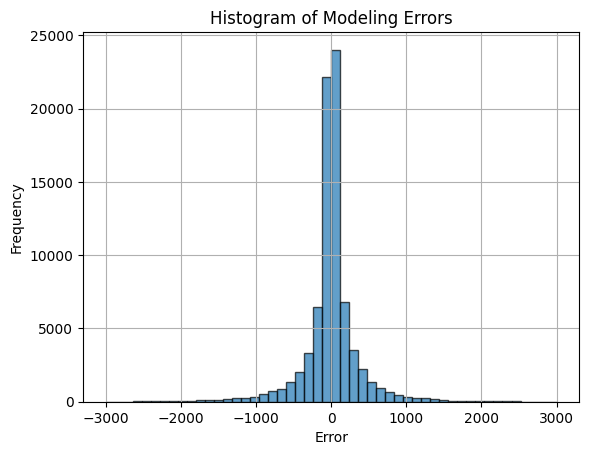

In [28]:
RFerrors = RFy_pred - y_test
plt.hist(RFerrors, bins=50, range=(-3000,3000), edgecolor='k', alpha=0.7)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Modeling Errors')
plt.grid(True)
plt.show()

# Model 2: XBGRegressor

In [17]:
from xgboost import XGBRegressor

# new model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# new pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', xgb_model)])

# Train
xgb_pipeline.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_pipeline.predict(X_test)



XGBoost RMSE: 639.8876736025907


In [24]:
from sklearn.metrics import mean_absolute_error, r2_score
# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb**0.5

# R-squared
r2_xgb = r2_score(y_test, y_pred_xgb)

#  Mean Absolute Error
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

rmse_percentage_xgb = (rmse_xgb / y_test.mean()) * 100

# Print the results
print(f'XGBoost RMSE: {rmse_xgb}')
print(f'XGBoost R-squared: {r2_xgb}')
print(f'XGBoost MAE: {mae_xgb}')
print(f'RMSE as a percentage of the mean target value: {rmse_percentage_xgb:.2f}%')


XGBoost RMSE: 639.8876736025907
XGBoost R-squared: 0.9797528643122124
XGBoost MAE: 359.4594639709874
RMSE as a percentage of the mean target value: 14.56%


In [19]:
# Use the trained pipeline to predict prices on the new dataset
XGBpredicted_prices = xgb_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_XGB'] = XGBpredicted_prices
df2024

,index,carat,cut,color,clarity,depth,table,length_mm,width_mm,height_mm,year,pred_cost_RF,pred_cost_XGB
0,0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,2024,642.17,467.791321
1,1,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,2024,372.38,535.891296
2,2,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,2024,448.48,453.846863
3,3,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,2024,441.73,436.566864
4,4,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,2024,436.38,414.444061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2024,3411.64,3570.949219
33936,33936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2024,3311.18,3446.611572
33937,33937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2024,3453.97,3318.579590
33938,33938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2024,3759.08,3493.625244


In [25]:
errors = y_pred_xgb - y_test


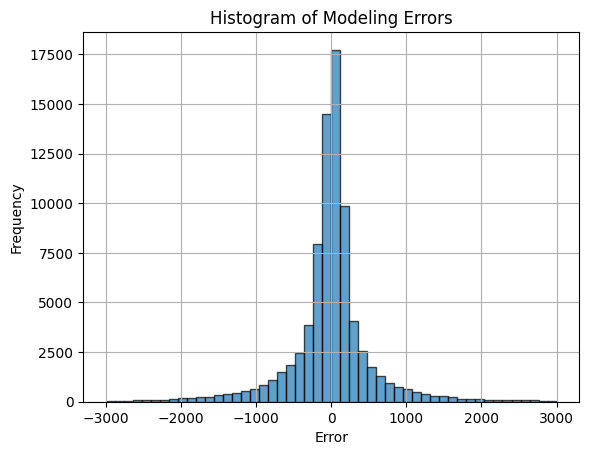

In [27]:
import matplotlib.pyplot as plt

# histogram of the errors
plt.hist(errors, bins=50, range=(-3000, 3000), edgecolor='k', alpha=0.7)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Histogram of Modeling Errors')
plt.grid(True)
plt.show()


# Model 3: LightGBMRegressor

In [20]:
from lightgbm import LGBMRegressor

# new model
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# new pipeline
lgbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', lgbm_model)])

# Train
lgbm_pipeline.fit(X_train, y_train)

# Predict
y_pred_lgbm = lgbm_pipeline.predict(X_test)

# Evaluate
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = mse_xgb**0.5
print(f'LightGBM RMSE: {rmse_lgbm}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1352
[LightGBM] [Info] Number of data points in the train set: 322439, number of used features: 27
[LightGBM] [Info] Start training from score 4396.821759
LightGBM RMSE: 639.8876736025907


In [21]:
rmse_percentage_lgbm = (rmse_lgbm / y_test.mean()) * 100
print(f'RMSE as a percentage of the mean target value: {rmse_percentage_lgbm:.2f}%')


RMSE as a percentage of the mean target value: 14.56%


In [22]:
# Use the trained pipeline to predict prices on the new dataset
lgbmpredicted_prices = lgbm_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_LGBM'] = lgbmpredicted_prices
df2024

,index,carat,cut,color,clarity,depth,table,length_mm,width_mm,height_mm,year,pred_cost_RF,pred_cost_XGB,pred_cost_LGBM
0,0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,2024,642.17,467.791321,708.738988
1,1,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,2024,372.38,535.891296,599.136539
2,2,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,2024,448.48,453.846863,606.568781
3,3,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,2024,441.73,436.566864,438.982570
4,4,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,2024,436.38,414.444061,510.562443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2024,3411.64,3570.949219,3426.049771
33936,33936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2024,3311.18,3446.611572,3414.174708
33937,33937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2024,3453.97,3318.579590,3199.590887
33938,33938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2024,3759.08,3493.625244,3639.807769


# Model 4: DecisionTreeRegressor

In [36]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error, r2_score
#import dmba
#from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn import tree

train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state=1)
train_x.head()

In [51]:
#Linear regression model of price vs. diamond attributes
# create a list containing predictors' name
predictors = ['carat', 'cut', 'color', 'depth', 'table', 'length_mm', 'width_mm', 'height_mm', 'clarity', 'year']
outcome = 'cost_dollars'

In [52]:
x = pd.get_dummies(diamond_df[predictors], drop_first=True)

# Remove spaces from variable names
x.columns = [col.replace(' ', '_') for col in x.columns]

In [53]:
y = diamond_df[outcome]

In [54]:
# partition data; split the data training (70%) vs. validation (30%)
# random_state=1: Pass an int for reproducible output across multiple function calls
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state=1)
train_x.head()

,carat,depth,table,length_mm,width_mm,height_mm,year,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
160391,0.40,62.5,57.0,4.72,4.75,2.96,2016,False,True,False,...,False,False,False,False,False,False,False,False,True,False
361161,0.50,61.1,67.0,5.07,5.04,3.09,2022,False,False,False,...,False,False,False,False,False,True,False,False,False,False
40528,1.11,61.9,58.0,6.63,6.59,4.09,2013,False,False,True,...,True,False,False,False,True,False,False,False,False,False
212556,1.01,59.7,59.0,6.50,6.56,3.90,2018,False,False,False,...,False,False,False,False,False,False,False,False,False,True
167988,0.91,64.4,57.0,6.11,6.09,3.93,2017,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [ ]:
#create a tree model
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_x, train_y)

plotDecisionTree(fullClassTree, feature_names=train_x.columns)

tree = fullClassTree
print('Number of nodes', tree.tree_.node_count)

# Model 5: KNN

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_model = KNeighborsRegressor(n_neighbors=5)  # You can tune this parameter

knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # Assuming preprocessor is defined
                               ('scaler', StandardScaler()),    # Standardize features
                               ('model', knn_model)])

# Train
knn_pipeline.fit(X_train, y_train)

# Predict
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mse_knn**0.5
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f'KNN RMSE: {rmse_knn}')
print(f'KNN R-squared: {r2_knn}')
print(f'KNN MAE: {mae_knn}')
print(f'KNN MSE: {mse_knn}')

KNN RMSE: 583.7737314935794
KNN R-squared: 0.983148242441842
KNN MAE: 329.224096265972
KNN MSE: 340791.7695819377


In [33]:
# Use the trained pipeline to predict prices on the new dataset
knnpredicted_prices = knn_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_KNN'] = knnpredicted_prices
df2024

,index,carat,cut,color,clarity,depth,table,length_mm,width_mm,height_mm,year,pred_cost_RF,pred_cost_XGB,pred_cost_LGBM,pred_cost_KNN
0,0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,2024,642.17,467.791321,708.738988,642.4
1,1,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,2024,372.38,535.891296,599.136539,398.0
2,2,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,2024,448.48,453.846863,606.568781,658.0
3,3,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,2024,441.73,436.566864,438.982570,529.0
4,4,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,2024,436.38,414.444061,510.562443,428.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2024,3411.64,3570.949219,3426.049771,3975.2
33936,33936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2024,3311.18,3446.611572,3414.174708,3042.8
33937,33937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2024,3453.97,3318.579590,3199.590887,3045.4
33938,33938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2024,3759.08,3493.625244,3639.807769,3278.6


# Model 6: Lin Reg

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

linear_model = LinearRegression()

linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # Assuming preprocessor is defined
                                  ('scaler', StandardScaler()),    # Standardize features
                                  ('model', linear_model)])

# Train
linear_pipeline.fit(X_train, y_train)

# Predict
y_pred_linear = linear_pipeline.predict(X_test)

# Evaluate
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mse_linear**0.5
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)


print(f'Linear Regression RMSE: {rmse_linear}')
print(f'Linear Regression R-squared: {r2_linear}')
print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression MSE: {mse_linear}')

Linear Regression RMSE: 1337.7745299498076
Linear Regression R-squared: 0.9115043443937904
Linear Regression MAE: 869.7147402319503
Linear Regression MSE: 1789640.692982429


In [34]:
# Use the trained pipeline to predict prices on the new dataset
linearpredicted_prices = linear_pipeline.predict(df2024)

# Add the predicted prices to the new dataset DataFrame
df2024['pred_cost_Lin'] = linearpredicted_prices
df2024

,index,carat,cut,color,clarity,depth,table,length_mm,width_mm,height_mm,year,pred_cost_RF,pred_cost_XGB,pred_cost_LGBM,pred_cost_KNN,pred_cost_Lin
0,0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,2024,642.17,467.791321,708.738988,642.4,-850.197875
1,1,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,2024,372.38,535.891296,599.136539,398.0,889.016969
2,2,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,2024,448.48,453.846863,606.568781,658.0,-277.248656
3,3,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,2024,441.73,436.566864,438.982570,529.0,-3297.557250
4,4,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,2024,436.38,414.444061,510.562443,428.2,-987.249632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2024,3411.64,3570.949219,3426.049771,3975.2,4454.682985
33936,33936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2024,3311.18,3446.611572,3414.174708,3042.8,4161.915407
33937,33937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2024,3453.97,3318.579590,3199.590887,3045.4,3937.700563
33938,33938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2024,3759.08,3493.625244,3639.807769,3278.6,3472.653688


# Ensemble Learning

In [35]:
import pandas as pd
import numpy as np

# Average predicted cost
df2024['pred_cost_avg'] = df2024[['pred_cost_RF', 'pred_cost_XGB', 'pred_cost_LGBM', 'pred_cost_KNN']].mean(axis=1)

# Cost range (max - min)
df2024['pred_cost_range_min'] = df2024[['pred_cost_RF', 'pred_cost_XGB', 'pred_cost_LGBM', 'pred_cost_KNN']].min(axis=1)
df2024['pred_cost_range_max'] = df2024[['pred_cost_RF', 'pred_cost_XGB', 'pred_cost_LGBM', 'pred_cost_KNN']].max(axis=1)

df2024

,index,carat,cut,color,clarity,depth,table,length_mm,width_mm,height_mm,year,pred_cost_RF,pred_cost_XGB,pred_cost_LGBM,pred_cost_KNN,pred_cost_Lin,pred_cost_avg,pred_cost_range_min,pred_cost_range_max
0,0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,2024,642.17,467.791321,708.738988,642.4,-850.197875,615.275077,467.791321,708.738988
1,1,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,2024,372.38,535.891296,599.136539,398.0,889.016969,476.351959,372.380000,599.136539
2,2,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,2024,448.48,453.846863,606.568781,658.0,-277.248656,541.723911,448.480000,658.000000
3,3,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,2024,441.73,436.566864,438.982570,529.0,-3297.557250,461.569858,436.566864,529.000000
4,4,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,2024,436.38,414.444061,510.562443,428.2,-987.249632,447.396626,414.444061,510.562443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33935,33935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2024,3411.64,3570.949219,3426.049771,3975.2,4454.682985,3595.959748,3411.640000,3975.200000
33936,33936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2024,3311.18,3446.611572,3414.174708,3042.8,4161.915407,3303.691570,3042.800000,3446.611572
33937,33937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2024,3453.97,3318.579590,3199.590887,3045.4,3937.700563,3254.385119,3045.400000,3453.970000
33938,33938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2024,3759.08,3493.625244,3639.807769,3278.6,3472.653688,3542.778253,3278.600000,3759.080000


In [ ]:
from xgboost import XGBRegressor

# new model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# new pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', xgb_model)])

# Train
xgb_pipeline.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_pipeline.predict(X_test)